In [379]:
# Packages
#-----------Generic-------------#
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import model_selection
import numpy as np
#----------Clustering-----------#
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
#---------Algorithms-------------------#
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#--------Dimensionality Reduction------#
from sklearn import decomposition
#---------Metrics----------------------#
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
#-----------Data----------------------#
from sklearn.datasets import load_breast_cancer

### Question 1

In [367]:
def read_csv(path: str) -> 'dataframe':
    '''read the excel file and return a df'''
    
    return pd.read_csv(path)


def drop_cols(df: 'dataframe', cols: list):
    '''drop columns that are specified'''
    df.drop(columns=cols, inplace=True)

    
def label_encoder(df: 'dataframe', col: 'str'):
    '''label encodes the column of the df
    it uses sklearn label encoder'''
    le = preprocessing.LabelEncoder()
    vals = df[col].values
    le.fit(vals)
    encoded_vals = le.transform(vals)
    df[col] = encoded_vals


#This function is not used (Normalization is not necessary for K-means
#Performing k-means on normalized data gave the same result
# However this is used for predictive algorithms
def normalize(df: 'dataframe', cols: list):
    '''normalizes columns of dataframe'''
    transformer = preprocessing.Normalizer()
    for col in cols:
        vals = df[col].values.reshape(1, -1)
        transformer.fit(vals)
        norm_vals = transformer.transform(vals)
        df[col] = norm_vals[0]


def k_means_manhattan(df: 'dataframe'):
    '''
    This function labels the data using k-means cluster
    have used pyClustering library since you can define type of distance measuring
    distance_metric(2) refers to manhattan in this library
    '''
    initial_centers = random_center_initializer(df.values, 5, random_state=5).initialize()
    #distance metric 2 for manhattan
    Kmeans_manhattan = kmeans(df, initial_centers=initial_centers, metric=distance_metric(2))
    Kmeans_manhattan.process()
    pyClusters = Kmeans_manhattan.get_clusters()
    pyCenters = Kmeans_manhattan.get_centers()
    pyEncoding = Kmeans_manhattan.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, df)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    df['Labels'] = pyLabels


def train_test_split(df: 'dataframe'):
    '''
    This function normalizes and splits the data into train and test
    '''
    normalize(df, ['Annual_Income_(k$)', 'Spending_Score'])
    X = df[['Annual_Income_(k$)', 'Spending_Score']]
    Y = df[['Labels']]
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=0)
    return X_train, X_test, y_train, y_test


def logistic_reg(X_train: 'df', X_test: 'df', y_train: 'df', y_test: 'df'):
    '''
    applying logistic regression
    '''
    print('performing logistic regression...')
    lr = LogisticRegression(random_state=0, multi_class='multinomial')
    lr.fit(X_train.values, y_train.values.ravel())
    y_lr = lr.predict(X_test.values)
    print('metrics for logistic regression...')
    print(f'accuracy: {accuracy_score(y_test.values.ravel(), y_lr)}')
    print('confusion matrix for Logistic Regression\n')
    cm = confusion_matrix(y_test.values.ravel(), y_lr, labels=lr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
    disp.plot()
    plt.show()
    
def decesion_tree(X_train: 'df', X_test: 'df', y_train: 'df', y_test: 'df'):
    '''
    applying decesion tree
    '''
    print('performing Decesion Tree...')
    dt = DecisionTreeClassifier(random_state=0, max_depth=5)
    dt.fit(X_train.values, y_train.values.ravel())
    y_dt = dt.predict(X_test.values)
    print('metrics for Decesion Tree...')
    print(f'accuracy: {accuracy_score(y_test.values.ravel(), y_dt)}')
    print('confusion matrix for Decesion Tree\n')
    cm = confusion_matrix(y_test.values.ravel(), y_dt, labels=dt.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
    disp.plot()
    plt.show()


def random_forest(X_train: 'df', X_test: 'df', y_train: 'df', y_test: 'df'):
    '''
    applying random forest
    '''
    print('performing Random Forest...')
    rf = RandomForestClassifier(random_state=0, max_depth=5)
    rf.fit(X_train.values, y_train.values.ravel())
    y_rf = rf.predict(X_test.values)
    print('metrics for Random Forest...')
    print(f'accuracy: {accuracy_score(y_test.values.ravel(), y_rf)}')
    print('confusion matrix for Random Forest\n')
    cm = confusion_matrix(y_test.values.ravel(), y_rf, labels=rf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
    disp.plot()
    plt.show()

def naive_bayes(X_train: 'df', X_test: 'df', y_train: 'df', y_test: 'df'):
    '''
    applying naive bayes
    '''
    print('performing Random Forest...')
    nv = GaussianNB()
    nv.fit(X_train.values, y_train.values.ravel())
    y_nv = nv.predict(X_test.values)
    print('metrics for Naive Bayes...')
    print(f'accuracy: {accuracy_score(y_test.values.ravel(), y_nv)}')
    print('confusion matrix for Naive Bayes\n')
    cm = confusion_matrix(y_test.values.ravel(), y_nv, labels=nv.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nv.classes_)
    disp.plot()
    plt.show()


#### Loading Data

In [319]:
df = read_excel('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [320]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [322]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [323]:
print('label encoding data...')
label_encoder(df, 'Genre')
print('Removing columns that are not needed...')
drop_cols(df, ['CustomerID', 'Genre', 'Age'])
print('data after pre-processing...')
df.head(10)

label encoding data...
Removing columns that are not needed...
data after pre-processing...


,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


#### Running K-Mean clustering and Labeling Data

In [324]:
print('running k-means clustering with manhattan distance...')
print('applying the labels based on k-means')
k_means_manhattan(df)
print('data after labelling...')
df.head(10)

running k-means clustering with manhattan distance...
applying the labels based on k-means
data after labelling...


,Annual_Income_(k$),Spending_Score,Labels
0,15,39,3
1,15,81,1
2,16,6,3
3,16,77,1
4,17,40,3
5,17,76,1
6,18,6,3
7,18,94,1
8,19,3,3
9,19,72,1


#### Performing Algorithms

In [328]:
# splitting the data and normalizing
X_train, X_test, y_train, y_test = train_test_split(df)

**Logistic Regression**

performing logistic regression...
metrics for logistic regression...
accuracy: 0.46
confusion matrix for Logistic Regression



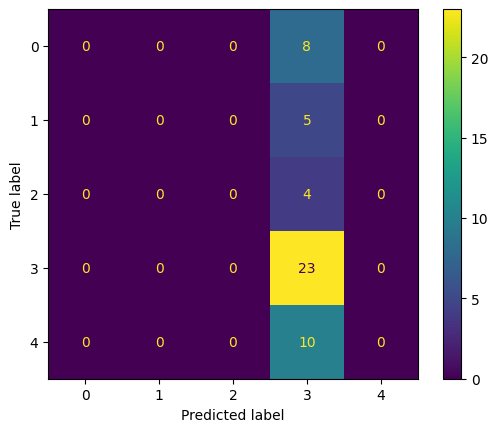

In [354]:
logistic_reg(X_train, X_test, y_train, y_test)

**Decesion Tree**

performing Decesion Tree...
metrics for Decesion Tree...
accuracy: 0.98
confusion matrix for Decesion Tree



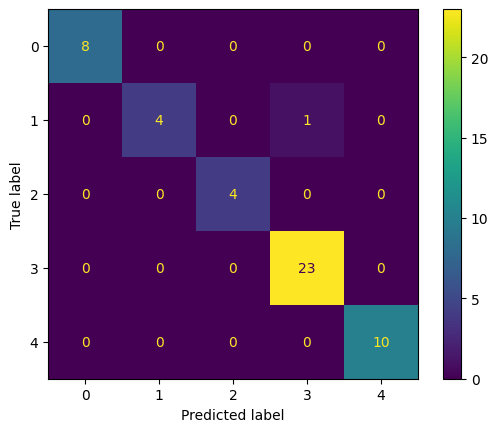

In [358]:
decesion_tree(X_train, X_test, y_train, y_test)

**Random Forest**

performing Random Forest...
metrics for Random Forest...
accuracy: 1.0
confusion matrix for Random Forest



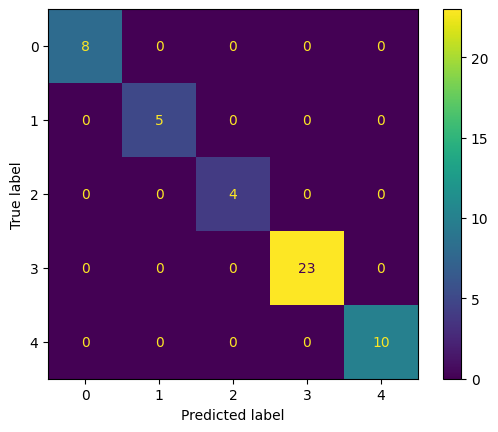

In [363]:
random_forest(X_train, X_test, y_train, y_test)

performing Random Forest...
metrics for Naive Bayes...
accuracy: 0.92
confusion matrix for Naive Bayes



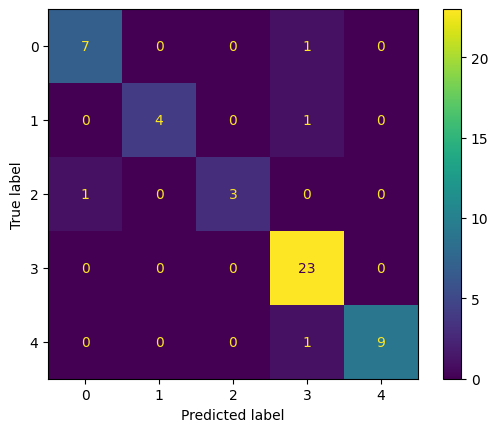

In [368]:
naive_bayes(X_train, X_test, y_train, y_test)

#### Conclusion


## Question 2

In [463]:
def load_data():
    '''
    load breast cancer data and normalize it
    '''
    cancer = load_breast_cancer()
    df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))
    df_normalized=(df - df.mean()) / df.std()
    return df_normalized


def pca_reduction(df: 'dataframe', n: int) -> 'dataframe':
    '''
    peform pca reduction on dataframe and plots PCA against first two columns
    passed dataframe must be normalized
    '''
    X = df.loc[:, df.columns != 'target']
    pca = decomposition.PCA(n_components=n)
    principal_comp = pca.fit_transform(X)
    principal_df = pd.DataFrame(data=principal_comp, columns=['principal_comp_1', 'principal_comp_2'])
    final_df = pd.concat([principal_df, df[['target']]], axis=1)
    
    #plot the PCA and the old data
    X_new = pca.inverse_transform(principal_comp)
    plt.scatter(X['mean compactness'].values, X['mean concavity'].values, label='original columns', alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1],label='pca components', alpha=0.8)
    plt.axis('equal')
    plt.legend(loc="upper left")
    plt.xlabel('PCA Component 1 & Mean Compactness')
    plt.ylabel('PCA Component 2 & Mean Concavity')
    plt.title('PCA Components Compare to Columns')
    return final_df


def lda_reduction(df: 'dataframe'm n: int):
    '''
    performs lda reduction on dataframe and plots lda against one column

#### Loading data

In [465]:
df = load_data()

In [468]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,-1.296535
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,-1.296535
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,-1.296535
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,-1.296535
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,-1.296535
5,-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.865540,0.823931,1.004518,1.888343,...,-0.313560,-0.114908,-0.244105,2.046712,1.720103,1.262133,0.905091,1.752527,2.239831,-1.296535
6,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662,...,0.322599,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718,-1.296535
7,-0.118413,0.358135,-0.072803,-0.218772,1.602639,1.139100,0.060972,0.281702,1.402121,1.658894,...,0.400695,0.099361,0.028834,1.446688,0.724148,-0.021035,0.623647,0.477221,1.724917,-1.296535
8,-0.319885,0.588312,-0.183919,-0.383870,2.199903,1.682529,1.218025,1.149680,1.963872,1.571079,...,0.822090,-0.031581,-0.248145,1.661295,1.816711,1.278909,1.390393,2.387756,1.287517,-1.296535
9,-0.473118,1.104467,-0.329192,-0.508616,1.581308,2.561105,1.737343,0.940932,0.796597,2.780649,...,2.440961,-0.286026,-0.297148,2.318256,5.108382,3.991920,1.618591,2.368360,6.840837,-1.296535


#### Applying pca reduction 

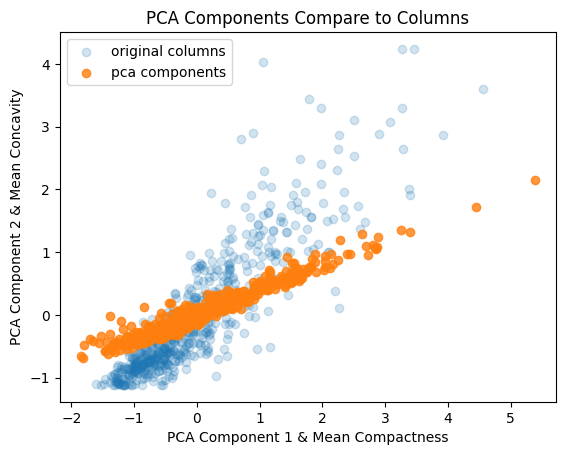

In [466]:
pca_2_df = pca_reduction(df, 2)

In [467]:
pca_2_df

,principal_comp_1,principal_comp_2,target
0,9.184755,1.946870,-1.296535
1,2.385703,-3.764859,-1.296535
2,5.728855,-1.074229,-1.296535
3,7.116691,10.266556,-1.296535
4,3.931842,-1.946359,-1.296535
...,...,...,...
564,6.433655,-3.573673,-1.296535
565,3.790048,-3.580897,-1.296535
566,1.255075,-1.900624,-1.296535
567,10.365673,1.670540,-1.296535
